In [21]:
import shapely;
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
from matplotlib import pyplot as plt;
from matplotlib import patches
from shapely import geometry
import numpy as np;

# If SNAP is true, then only integer coordinates in [0,10] are taken
SNAP=True


# A helper function to plot a polygon. In python, you need to create and add a shape to an axis.
def plot_polygon(ax, poly, color):
    x, y = poly.exterior.coords.xy
    points = np.array([x, y], np.float32).T
    polygon_shape = patches.Polygon(points, linewidth=1, edgecolor='k', facecolor=color, alpha=0.5)
    ax.add_patch(polygon_shape)


# Calculate the 9-IM matrix as a matrix.
def de9im(geom1, geom2):
    return(np.array([x for x in geom1.relate(geom2)]).reshape(3,3))




# Plotting the polygon (ignoring inner rings)
# Create a random polygon
dt = np.float32
if SNAP:
    dt = np.int8

A = geometry.Polygon (
   np.random.uniform(0,10,6).reshape(-1,2).astype(dt) # create 3x2
)
print(A)

POLYGON ((7 0, 5 2, 2 4, 7 0))


Now, A contains a rather random polygon. We know its coordinates are within 0 and 10 in all dimensions

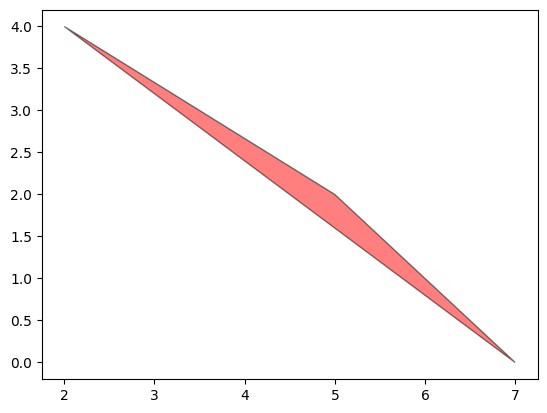

In [23]:
fig, ax = plt.subplots(1)
# Draw both polygons
plot_polygon(ax, A,'r')
plt.axis("auto")
plt.show()

We rasterize in the most simple way: generate points along an image of a certain size, compute the coordinates, create a Shapely point and take Shapelys intersect to find out the color (value) to write.

In [26]:
image = np.zeros(100*100).reshape(-1,100)
for r in range(100):
    for c in range(100):
        p = shapely.Point(r/10, c/10)
        if p.intersects(A):
            image[100-c-1,r]=1
        

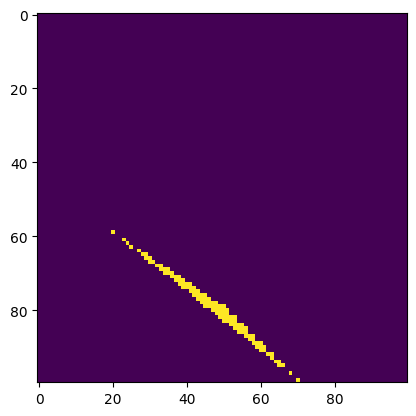

In [27]:
plt.imshow(image)

Howdy, this does not look good. Maybe, we should consider the whole pixel area?

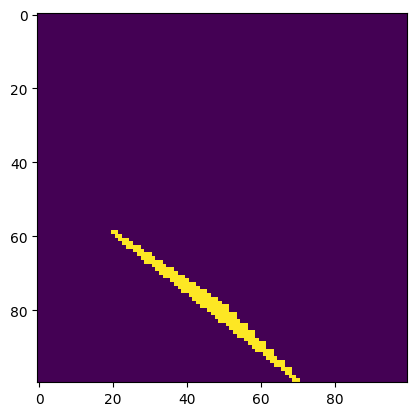

In [31]:
image = np.zeros(100*100).reshape(-1,100)
for r in range(100):
    for c in range(100):
        b = shapely.box(r/10-1/20, c/10-1/20,r/10+1/20, c/10+1/20)
        p = shapely.Point(r/10, c/10)
        if b.intersects(A):
            image[100-c-1,r]=1
plt.imshow(image)
plt.show()